In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# Import pandas and read in the GDrive-mounted CSV
# Original link to datasource found at https://www.kaggle.com/tomigelo/spotify-audio-features/home
    
import pandas as pd
from scipy import stats
import seaborn as sns 
import numpy as np
sns.set()
sns.set_style("darkgrid", rc={'figure.facecolor':'#191414', 
                              'axes.labelcolor': '#FFFFFF',
                              'text.color': '#FFFFFF',
                              'xtick.color': '#FFFFFF',
                              'ytick.color': '#FFFFFF'})
    
df = pd.read_csv('/content/gdrive/My Drive/Colab Datasets/SpotifyAudioFeaturesApril2019.csv')
df.head()

,artist_name,track_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
0,YG,2RM4jf1Xa9zPgMGRDiht8O,"Big Bank feat. 2 Chainz, Big Sean, Nicki Minaj",0.005820,0.743,238373,0.339,0.000,1,0.0812,-7.678,1,0.4090,203.927,4,0.118,15
1,YG,1tHDG53xJNGsItRA3vfVgs,BAND DRUM (feat. A$AP Rocky),0.024400,0.846,214800,0.557,0.000,8,0.2860,-7.259,1,0.4570,159.009,4,0.371,0
2,R3HAB,6Wosx2euFPMT14UXiWudMy,Radio Silence,0.025000,0.603,138913,0.723,0.000,9,0.0824,-5.890,0,0.0454,114.966,4,0.382,56
3,Chris Cooq,3J2Jpw61sO7l6Hc7qdYV91,Lactose,0.029400,0.800,125381,0.579,0.912,5,0.0994,-12.118,0,0.0701,123.003,4,0.641,0
4,Chris Cooq,2jbYvQCyPgX3CdmAzeVeuS,Same - Original mix,0.000035,0.783,124016,0.792,0.878,7,0.0332,-10.277,1,0.0661,120.047,4,0.928,0


To examine how different features of a song affect it's popularity we will be conducting t-tests on the popularity of different categories of features.

In this notebook we will examine energy, danceability and valence.

First we must separate songs into low/high categories using the median value of each respective feature.

In [ ]:
# Seperate into low and high energy by splitting into groups that are higher or lower than 0.50

low_energy = df.iloc[(df['energy'] < 0.50).values]
high_energy = df.iloc[(df['energy'] >= 0.50).values]
print(low_energy[['artist_name', 'track_name', 'energy']])

                artist_name  ... energy
0                        YG  ...  0.339
5                     Curbo  ...  0.417
7                   G Herbo  ...  0.348
8                   34 Feet  ...  0.472
24                Bob Janga  ...  0.454
...                     ...  ...    ...
130644            floridomi  ...  0.457
130648         Tierra Whack  ...  0.219
130654  Gregory Alan Isakov  ...  0.393
130656                Echos  ...  0.284
130659         Saint Claire  ...  0.249

[47281 rows x 3 columns]


In [ ]:
# Run ttest on both samples to obtain a p-value which allows us to determine if the difference in population means is statistically significant
stats.ttest_ind(low_energy['popularity'], high_energy['popularity'])

Ttest_indResult(statistic=-40.85074558903801, pvalue=0.0)

As the p-value is close to 0 and less than 0.05 we can reject the null hypothesis that there is no difference in population means between the popularity of low energy and high energy songs.

Now we can find the means of each sample to compare.

In [ ]:
low_energy_mean = low_energy['popularity'].mean()
high_energy_mean = high_energy['popularity'].mean()
print('Low Energy Mean: ', low_energy_mean, '\n', 'High Energy Mean: ', high_energy_mean)

Low Energy Mean:  21.269177893868573 
 High Energy Mean:  25.87598042743038


We can now graph these means to visualize the difference.  We need to plot the different energy types against their popularity.  Since the original dataset doesn't have the energy type as a categorical value, we create one using numpy.

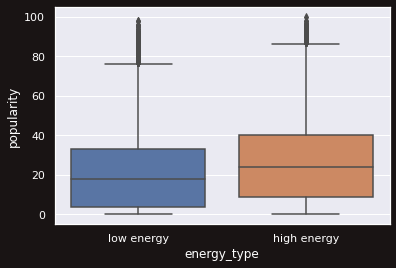

In [ ]:
# create a list of our conditions
conditions = [
    (df['energy'] < 0.50),
    (df['energy'] >= 0.50)
    ]

# create a list of the values we want to assign for each condition
values = ['low energy', 'high energy']

# create a new column and use np.select to assign values to it using our lists as arguments
df['energy_type'] = np.select(conditions, values)

sns.boxplot(y='popularity', x='energy_type', data=df)

As you can see here, songs with high energy have a higher median popularity values.

Now we can use this same method to explore danceability

In [ ]:
# Seperate into low and high danceability by splitting into groups that are higher or lower than 0.50

low_danceability = df.iloc[(df['danceability'] < 0.50).values]
high_danceability = df.iloc[(df['danceability'] >= 0.50).values]

stats.ttest_ind(low_danceability['popularity'], high_danceability['popularity'])

Ttest_indResult(statistic=-40.08225634407323, pvalue=0.0)

As the p-value is close to 0 and less than 0.05 we can reject the null hypothesis that there is no difference in population means between the popularity of low energy and high energy songs.

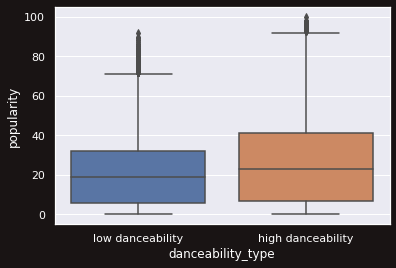

In [ ]:
# create a list of our conditions
conditions = [
    (df['danceability'] < 0.50),
    (df['danceability'] >= 0.50)
    ]

# create a list of the values we want to assign for each condition
values = ['low danceability', 'high danceability']

# create a new column and use np.select to assign values to it using our lists as arguments
df['danceability_type'] = np.select(conditions, values)

sns.boxplot(y='popularity', x='danceability_type', order=['low danceability', 'high danceability'], data=df)

We can see that songs that are more danceable tend to be more popular.

Finally we can repeat this method one more time for valence.

In [ ]:
low_energy = df.iloc[(df['valence'] < 0.50).values]
high_energy = df.iloc[(df['valence'] >= 0.50).values]

stats.ttest_ind(low_energy['popularity'], high_energy['popularity'])

Ttest_indResult(statistic=-0.49260476157965255, pvalue=0.6222927106786019)

Here we find the p-value > 0.05 so we can't reject the null hypothesis.

We can still visualize the difference in valences for consistency, but it's important to keep in mind that any difference you may see isn't statistically significant and could be due to random chance.

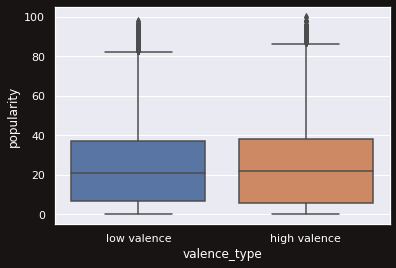

In [ ]:
# create a list of our conditions
conditions = [
    (df['valence'] < 0.50),
    (df['valence'] >= 0.50)
    ]

# create a list of the values we want to assign for each condition
values = ['low valence', 'high valence']

# create a new column and use np.select to assign values to it using our lists as arguments
df['valence_type'] = np.select(conditions, values)

sns.boxplot(y='popularity', x='valence_type', data=df)

From this analysis we've discovered how the difference in energy and danceability of a song can influence it's popularity.  We also found that the valence of a song should not have an effect on it's popularity.

Using this knowledge an artist wanting to be popular may be interested in creating danceable, high energy songs.  Of course there are many other factors that will impact how popular there music will be, but using these insights can give atleast some guidance towards how an artist can find success.